### Importing Libraries

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
# Importing Libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [3]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset from csv to dataframe

leads = pd.read_csv("Leads.csv")

In [5]:
# Checking if the csv was imported successfully or not

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Checking the shape-

leads.shape

(9240, 37)

In [7]:
# Checking info for all the columns of dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### We can observe that there are some columns with null values and also there are some categorical columns for which we might need to create dummy variables

In [8]:
# Checking stats for various columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Cheching for duplicate values based on their Lead Number and Prospect ID

In [9]:
sum(leads.duplicated(subset = 'Lead Number')) == sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

Therefore there are no duplicate enteries 

## Data Cleaning & EDA

In [10]:
# Dropping Prospect ID and lead Number as they dont provide any insights 

leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [11]:
leads.shape

(9240, 35)

In [12]:
leads.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


There are few columns with category called 'Select' which implies that the customer did not selected the option for that particular column. Hence, these can be treated as Nan

In [13]:
# Replacing 'Select' with nan

leads = leads.replace('Select', np.nan)

In [14]:
# Checking for total number of null values for each column

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
# Checking the percentage of null values for each column

round((leads.isnull().sum()/len(leads.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
# Dropping columns with more than 40% null values

columns = leads.columns
dropped_columns= []
for column in columns:
    if(((leads[column].isnull().sum()/len(leads.index)))*100 >= 40):
        leads.drop(column, axis = 1, inplace = True)
        dropped_columns.append(column)

In [17]:
# Dropped columns

dropped_columns

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [18]:
# Checking the percentage of null values for each column after dropping the columns

round((leads.isnull().sum()/len(leads.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [19]:
# Checking for unique values present for each column

for col in leads.select_dtypes(include='object'):
  print(leads[col].value_counts(normalize=True))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
No     0.999784
Yes    0.000216
Name: Do Not Call, dtyp

In [20]:
# Dropping columns which have imbalanced data

columns_to_drop = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                  'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque']


In [21]:
leads.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

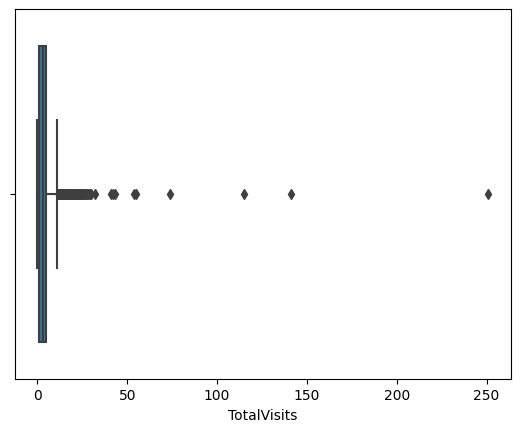

In [22]:
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# Plotting graphs for numeric columns
# Plotting graph for TotalVisits
sns.boxplot(x = leads['TotalVisits'])
plt.show()

It is observed that there are some outliers in Total Visits

[]

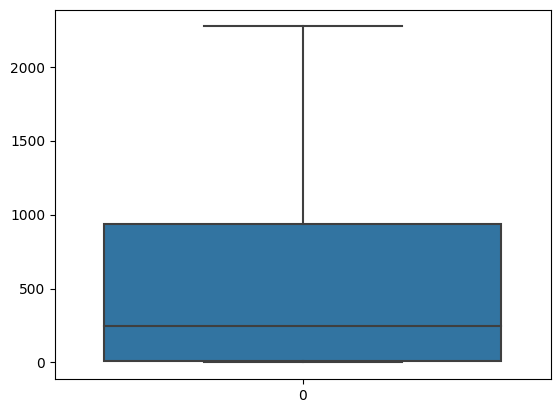

In [23]:
# Plotting graph for Total Time Spent on Website
sns.boxplot(leads['Total Time Spent on Website'])
plt.plot()

There are no outliers in Total Time Spent on Website column

[]

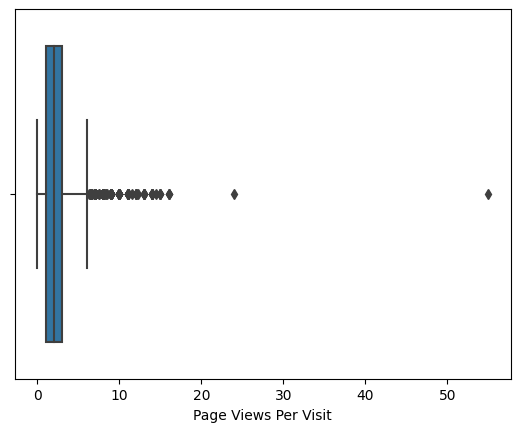

In [24]:
# Plotting graph for Page Views Per Visit
sns.boxplot(x = leads['Page Views Per Visit'])
plt.plot()

There are outliers present in Page Views Per Visit column

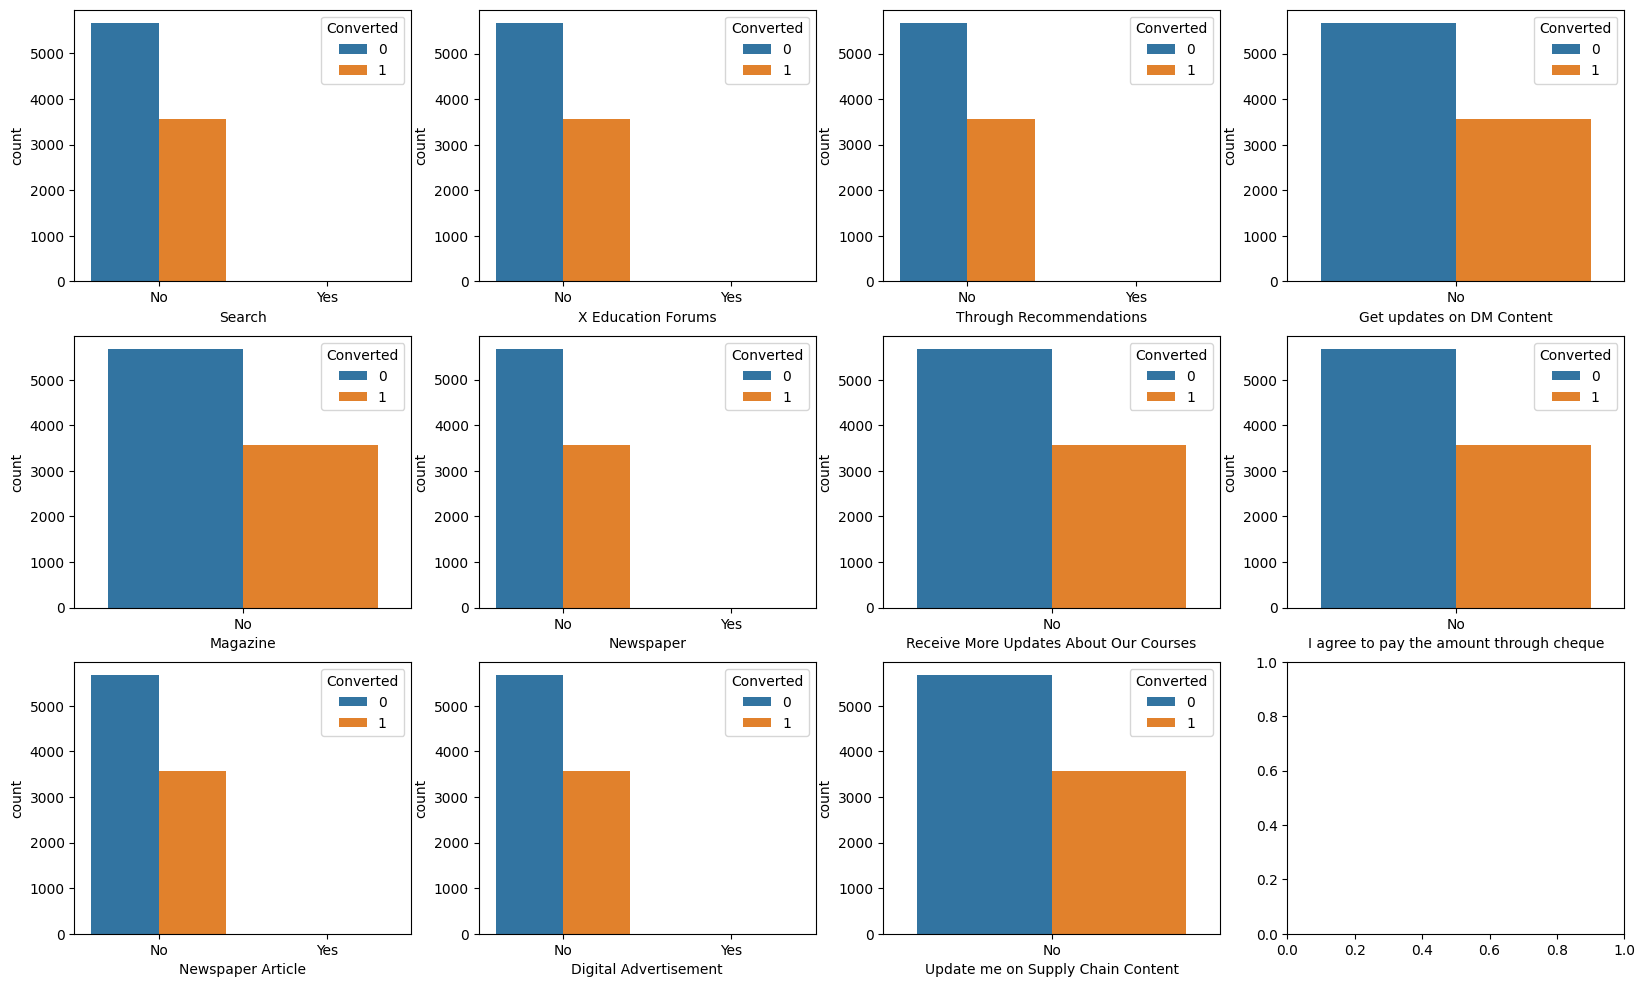

In [25]:
# Plotting graph to confirm that these columns are imbalanced
fig, axis = plt.subplots(3,4,figsize = (20,12))
i=j=0
for col in columns_to_drop:
    sns.countplot(x = col , hue = 'Converted', data = leads, ax = axis[i,j])
    i+=1
    if i==3:
        j+=1
        i=0
plt.show()

In [26]:
# Checking for country Column
leads.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

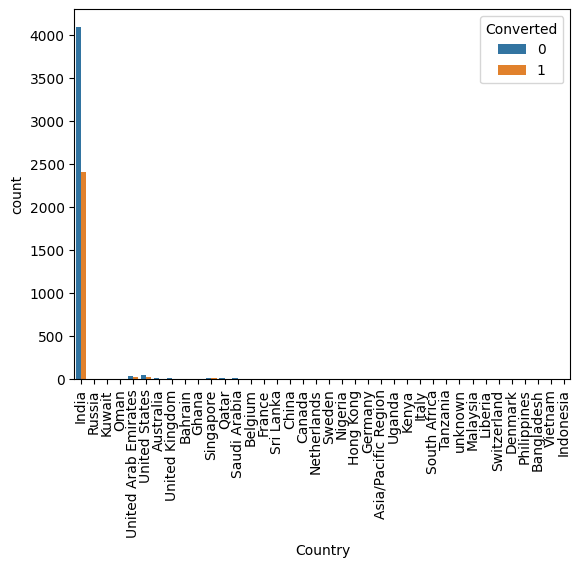

In [27]:
# Visualizing the country column

axs = sns.countplot(x = "Country" , hue = 'Converted', data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

### Observation - 

Almost all the leads are from India

In [28]:
# Since Majority of values are India so we can drop it

columns_to_drop.append('Country')

In [29]:
# Checking for City Column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')


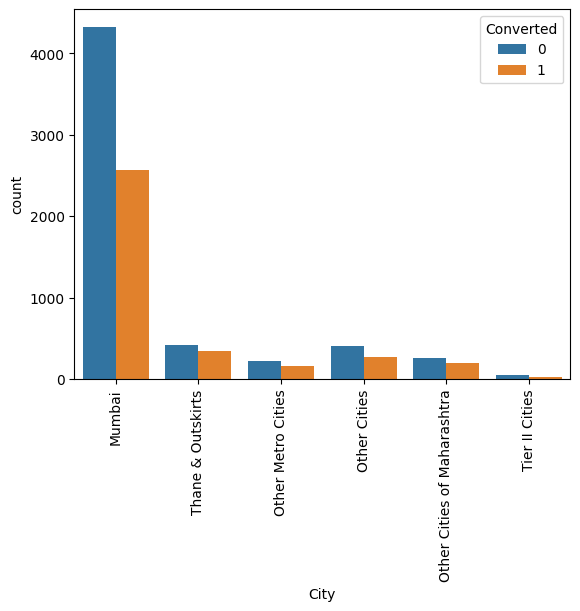

In [31]:
# Visualizing the City Column

axs = sns.countplot(x="City", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observation - 

Majority of leads are from Mumbai where as very less number of leads are from Teir 2 Cities

Most successfull conversions took place for Mumbai

In [32]:
# Checking for Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [33]:
# Converting 'google' to 'Google'

leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [34]:
# Creating a category called 'Others'

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel',
                                                     'welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM',np.nan] ,'Others')      

In [35]:
# Renaming Facebook Category to Socail Media

leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

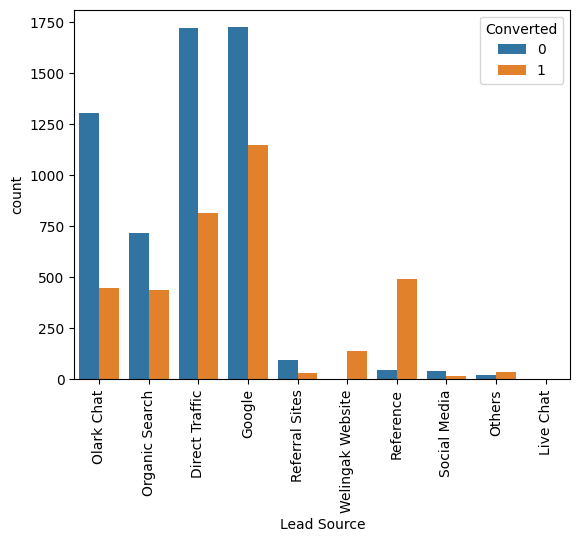

In [36]:
# Visualizing the Lead Source Column

axs = sns.countplot(x="Lead Source", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observation- 

Majority of leads came from either google or dircet traffic

LEad for whom the source was Google had more number of successfull conversions as compared to Direct Traffic

In [37]:
# Checking for Lead Origin column

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

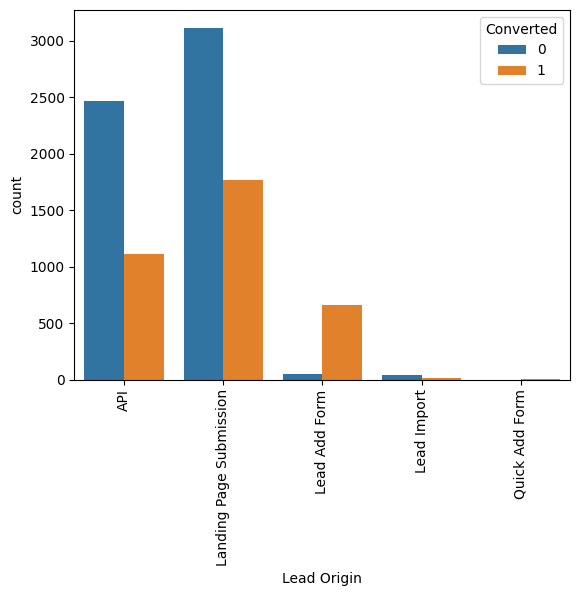

In [38]:
# Visualizing the Lead Origin Column

axs = sns.countplot(x="Lead Origin", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observations -

Landing Page Submissions was the biggest lead origin where as quick add form was the smallest

In [39]:
# Checking for Do Not Email column

leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

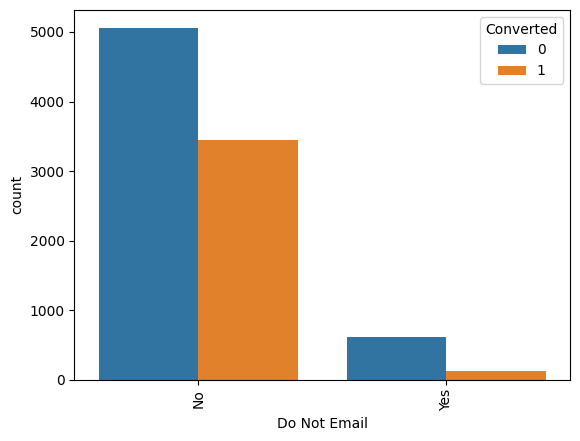

In [40]:
# Visualizing Do Not Email Column

axs = sns.countplot(x="Do Not Email", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observations - 

Majority of leads select No for Do Not Email and had a higher number of conversions as compared to leads who selected Yes

In [41]:
# Checking for Do Not Call column

leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

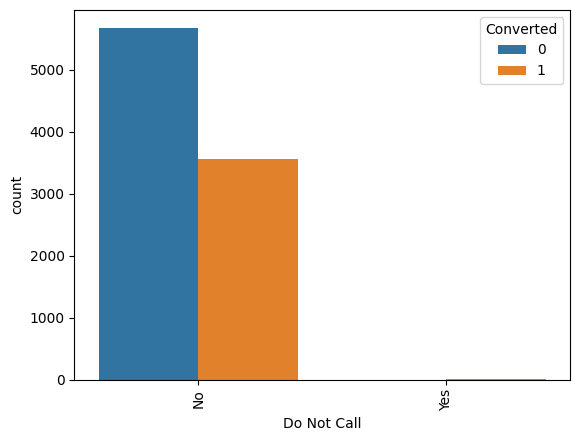

In [42]:
# Visualizing Do Not Call Column

axs = sns.countplot(x="Do Not Call", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observations - 

Majority of leads select No for Do Not Call and had a higher number of conversions as compared to leads who selected Yes

In [43]:
# Adding Do Not Call column to drop it later

columns_to_drop.append('Do Not Call')

In [44]:
# Checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [45]:
 # Replacing NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [46]:
# Combining all Management Specializations

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

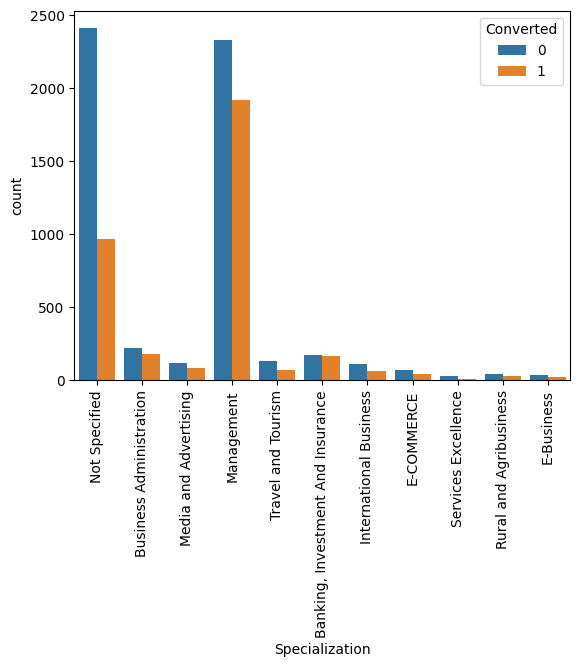

In [47]:
# Visualizing Specialization

axs = sns.countplot(x="Specialization", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observations- 

Majority of leads are have a specialization in Management whereas least number of leads have a specialization in Service Excellence and E-Business

Majority of successfull conversions took place for leads who have a specialization in Management 



In [48]:
# Checking What is your current occupation column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
# Replacing Nan values with Unemployed

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

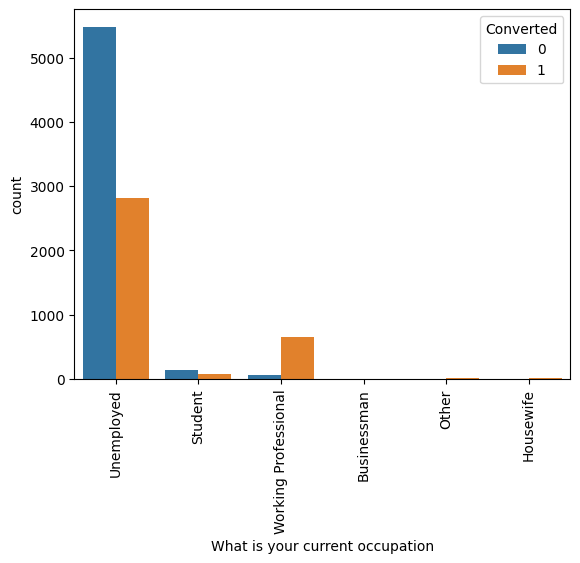

In [50]:
# Visualizing What is your current occupation

axs = sns.countplot(x="What is your current occupation", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observations-

Majority of leads are unemployed

Working Professionals have a higher percentage of conversion

Very less number of leads are either businessman and housewife

In [51]:
# Checking What matters most to you in choosing a course column

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [52]:
# Replacing Nan values with Better Career Prospects

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(
    np.nan,'Better Career Prospects')

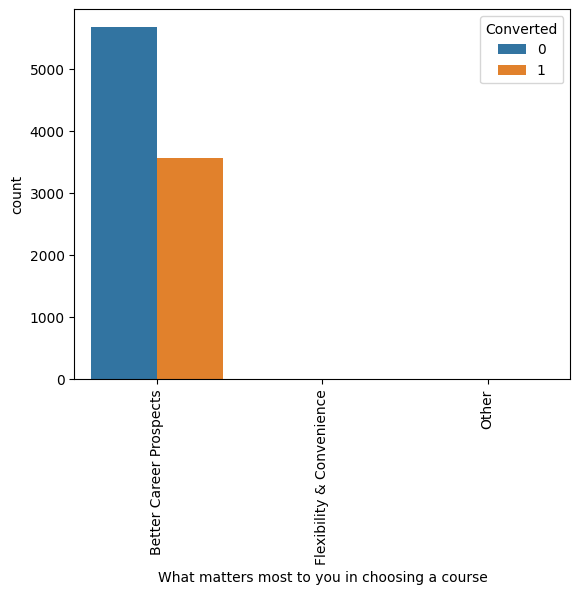

In [53]:
# Visualizing What matters most to you in choosing a course
axs = sns.countplot(x="What matters most to you in choosing a course", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [54]:
# There is an imbalance in data present in this column so we will drop it

columns_to_drop.append('What matters most to you in choosing a course')

In [55]:
# Checking Tag column

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [56]:
# Replacing Nan values with Not Provided

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Provided')

In [57]:
# Combining all the tags having low frequency as Other

leads['Tags'] = leads['Tags'].replace(['number not provided','in touch with EINS','Lost to Others','Still Thinking',
                 'Want to take admission but has financial problems','In confusion whether part time or DLP',
                 'Interested in Next batch','Lateral student','Shall take in the next coming month',
                 'University not recognized','Recognition issue (DEC approval)','wrong number given',
                                      'opp hangup'],'Other')

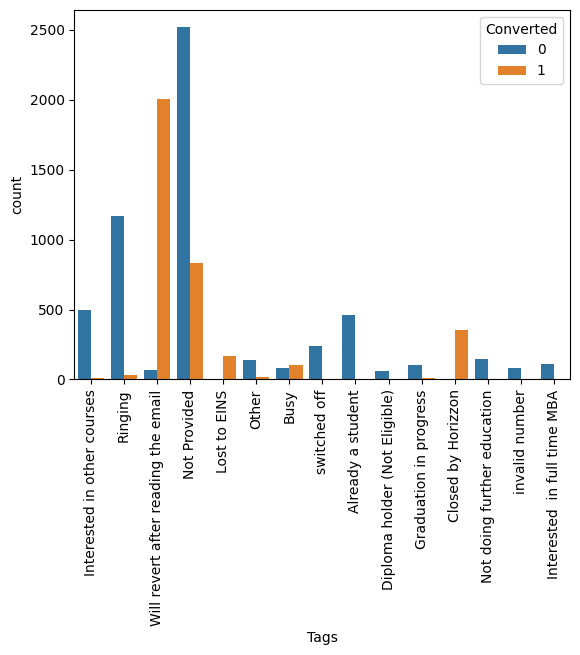

In [58]:
# Visualizing Tags

axs = sns.countplot(x="Tags", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [59]:
# Checking Last Activity column

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [60]:
# Combining low frequency values as others

leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Unreachable','Unsubscribed','Had a Phone Conversation',
                                                        'Approached upfront','View in browser link Clicked',
                                                        'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                        'Resubscribed to emails'],'Others')


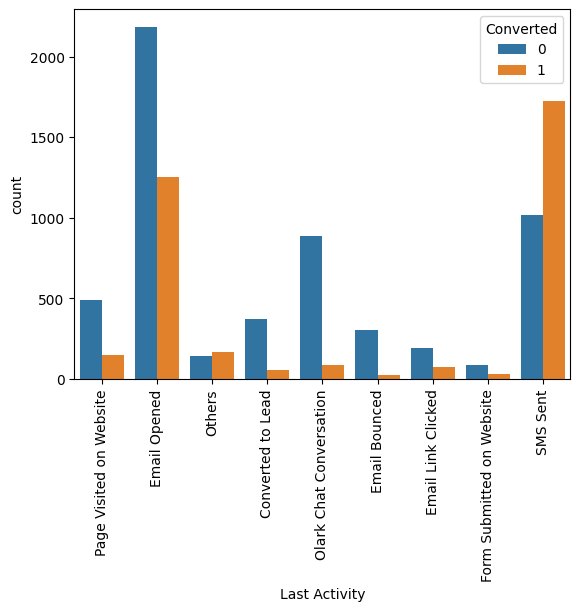

In [61]:
# Visualizing Last Activity column

axs = sns.countplot(x="Last Activity", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

## Observations - 

Leads who sent an sms had a higher percentage of successfull conversions


In [62]:
# Checking Last Notable Activity column

leads['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [63]:
# Combining low frequency values as Others

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                         'Had a Phone Conversation','Email Marked Spam',
                                                                         'Approached upfront','Resubscribed to emails',
                                                                         'View in browser link Clicked','Form Submitted on Website',
                                                                         'Email Received'],'Others')

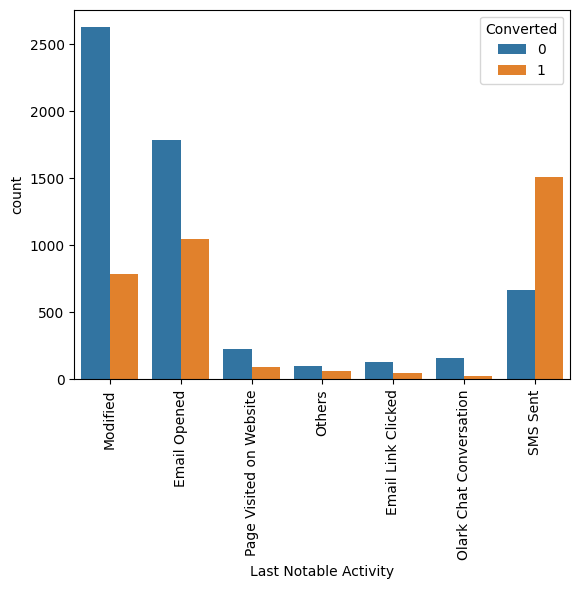

In [64]:
# Visualizing Last Notable Activity column

axs = sns.countplot(x="Last Notable Activity", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [65]:
# Checking A free copy of Mastering The Interview column

leads['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

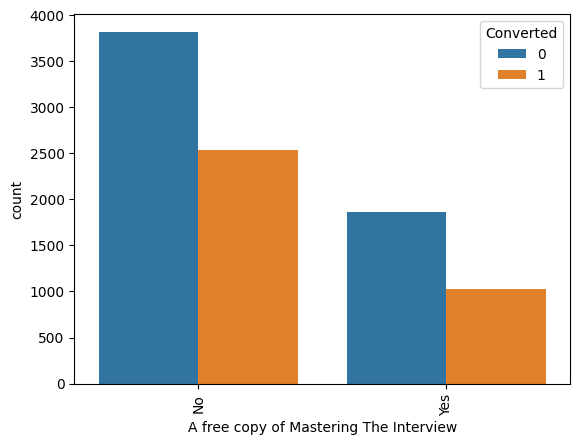

In [66]:
# Visualizing A free copy of Mastering The Interview column

axs = sns.countplot(x="A free copy of Mastering The Interview", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [67]:
# List of columns which we are going to drop

columns_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Country',
 'Do Not Call',
 'What matters most to you in choosing a course']

In [68]:
# Dropping the columns
leads = leads.drop(columns_to_drop, axis = 1)

In [69]:
# Checking the Null values in all the columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [70]:
# Dropping all the rows which have Nan values
leads = leads.dropna()

In [71]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [72]:
leads.shape

(9103, 14)

In [73]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Finding Correlation 

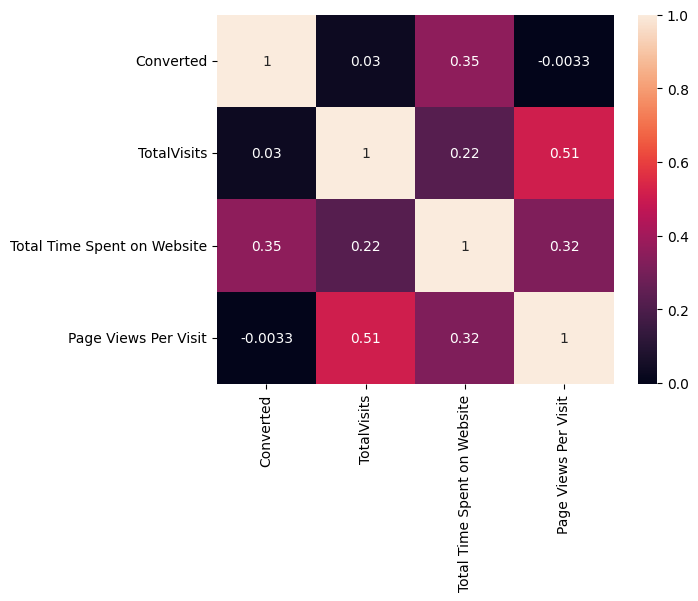

In [74]:
# Displaying heatmap
sns.heatmap(leads.corr(), annot=True)
plt.show()

## Creating dummy variables

In [75]:
# Creating Dummy Data for Lead Origin column
Lead_Origin = pd.get_dummies(leads['Lead Origin'],drop_first = True, prefix = 'LeadOrigin')
Lead_Origin.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [76]:
# Creating Dummy Data for Lead Source column
Lead_Source = pd.get_dummies(leads['Lead Source'], prefix = 'LeadSource')

# Since in Lead Source majority of Others category are actually null values, so we drop them instead of first
Lead_Source = Lead_Source.drop(['LeadSource_Others'], axis = 1)
Lead_Source.head()

,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [77]:
def mapping(x):
    """
    Function to map Yes with 1 and No with 0
    :param x:
    :return: 1 or 0
    """
    return x.map({'Yes': 1, "No": 0})

In [78]:
# Columns having "Yes" "No" values
cols = ['Do Not Email','A free copy of Mastering The Interview']

In [79]:
# Converting string to integer values
leads[cols] = leads[cols].apply(mapping)

In [80]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [81]:
# Creating Dummy Data for Last Activity column
Last_Activity = pd.get_dummies(leads['Last Activity'], prefix = 'LastActivity')

# Since in Last Activity majority of Others category are actually null values, so we drop them instead of first
Last_Activity = Last_Activity.drop(['LastActivity_Others'], axis = 1)
Last_Activity.head()

,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [82]:
# Creating Dummy Data for Specialization column
Specialization = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')

# Since in Last Activity majority of Others category are actually null values, so we drop them instead of first
Specialization = Specialization.drop(['Specialization_Not Specified'], axis = 1)
Specialization.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [83]:
# Creating Dummy Data for Tags column
Tags = pd.get_dummies(leads['Tags'], prefix = 'Tags')

# Since in Tags majority of Not Provided category are actually null values, so we drop them instead of first
Tags = Tags.drop(['Tags_Not Provided'], axis = 1)
Tags.head()

,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [84]:
# Creating Dummy Data for What is your current occupation column
Current_Occupation = pd.get_dummies(leads['What is your current occupation'],drop_first = True,
                                    prefix = 'CurrentOccupation')
Current_Occupation.head()

,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [85]:
# Creating Dummy Data for City column
City = pd.get_dummies(leads['City'], drop_first = True, prefix = 'City')
City.head()

,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [86]:
# Creating Dummy Data for Last Notable Activity column
Last_Notable_Activity = pd.get_dummies(leads['Last Notable Activity'],drop_first = True,
                                    prefix = 'LastNotableActivity')
Last_Notable_Activity.head()

,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [87]:
# Concatinating all the dataframes which we created above

leads = pd.concat([Lead_Origin,Lead_Source,Last_Activity,Specialization,Tags,Current_Occupation,City,Last_Notable_Activity,leads],axis = 1)

In [88]:
leads.shape

(9103, 74)

In [89]:
# Dropping all the columns for which we have created dummy variables

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)

In [90]:
leads.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,...,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,5.0,674,2.5
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,2.0,1532,2.0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1.0,305,1.0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,2.0,1428,1.0


## Splitting data for Train and Test

In [91]:
# Putting feature variable to X

X = leads.drop('Converted', axis=1)

# Checking head of X
X.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,...,City_Tier II Cities,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,5.0,674,2.5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2.0,1532,2.0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1.0,305,1.0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,2.0,1428,1.0


In [92]:
# Putting response variable to y
y = leads['Converted']

# Checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [94]:
# Checking details of X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   LeadOrigin_Landing Page Submission                6372 non-null   uint8  
 1   LeadOrigin_Lead Add Form                          6372 non-null   uint8  
 2   LeadOrigin_Lead Import                            6372 non-null   uint8  
 3   LeadSource_Direct Traffic                         6372 non-null   uint8  
 4   LeadSource_Google                                 6372 non-null   uint8  
 5   LeadSource_Live Chat                              6372 non-null   uint8  
 6   LeadSource_Olark Chat                             6372 non-null   uint8  
 7   LeadSource_Organic Search                         6372 non-null   uint8  
 8   LeadSource_Reference                              6372 non-null   uint8  
 9   LeadSource_Refer

## Feature Scaling

In [95]:
# Scaling features
scaler = StandardScaler()

numeric_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Checking X-train dataset after scaling
X_train.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,...,City_Tier II Cities,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7962,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.092900,1.476324,-0.394072
5520,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.695064,-0.771066,2.111481
1962,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0.301082,-0.571257,0.061483
1566,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,2.074000,1.393834,0.517039
9170,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,-0.683873,-0.881052,-1.077404


In [96]:
lr = LogisticRegression()
rfe = RFE(lr,n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LeadOrigin_Landing Page Submission', False, 17),
 ('LeadOrigin_Lead Add Form', False, 2),
 ('LeadOrigin_Lead Import', False, 26),
 ('LeadSource_Direct Traffic', False, 6),
 ('LeadSource_Google', False, 8),
 ('LeadSource_Live Chat', False, 49),
 ('LeadSource_Olark Chat', False, 25),
 ('LeadSource_Organic Search', False, 7),
 ('LeadSource_Reference', False, 14),
 ('LeadSource_Referral Sites', False, 9),
 ('LeadSource_Social Media', False, 41),
 ('LeadSource_Welingak Website', True, 1),
 ('LastActivity_Converted to Lead', False, 15),
 ('LastActivity_Email Bounced', False, 10),
 ('LastActivity_Email Link Clicked', False, 45),
 ('LastActivity_Email Opened', False, 29),
 ('LastActivity_Form Submitted on Website', False, 30),
 ('LastActivity_Olark Chat Conversation', False, 11),
 ('LastActivity_Page Visited on Website', False, 37),
 ('LastActivity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 35),
 ('Specialization_Business Administration', False, 47),
 

In [98]:
# List of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['LeadSource_Welingak Website', 'LastActivity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'LastNotableActivity_Email Opened',
       'LastNotableActivity_SMS Sent'],
      dtype='object')

In [99]:
# List of non RFE supported columns

X_train.columns[~rfe.support_]

Index(['LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Live Chat', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Opened',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence

## Model 1

In [100]:
X_train_sm = sm.add_constant(X_train[cols])
logreg1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1440.0
Date:                Fri, 24 Feb 2023   Deviance:                       2880.0
Time:                        18:11:16   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5835
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.5933      0.107    -24.321      0.000      -2.802      -2.384
LeadSource_Welingak Website                  4.3418      0.736      5.902      0.000       2.900       5.784
LastActivity_SMS Sent                        1.2796      0.197      6.507      0.000       0.894       1.665
Tags_Already a student                      -2.7891      0.585     -4.768      0.000      -3.936      -1.643
Tags_Closed by Horizzon                      6.9224      0.717      9.649      0.000       5.516       8.328
Tags_Diploma holder (Not Eligible)          -2.2110      1.034     -2.138      0.033      -4.238      -0.184
Tags_Interested in other courses            -1.7855      0.351     -5.086      0.000      -2.474      -1.097
Tags_Lost to EINS                            6.3757      0.720      8.852      0.000       4.964       7.787
Tags_Not doing further education            -2.7933      1.023     -2.731      0.006      -4.798      -0.789
Tags_Other                                  -1.6702      0.330     -5.054      0.000      -2.318      -1.022
Tags_Ringing                                -3.4756      0.236    -14.724      0.000      -3.938      -3.013
Tags_Will revert after reading the email     4.7150      0.176     26.819      0.000       4.370       5.060
Tags_invalid number                         -3.8843      1.025     -3.791      0.000      -5.893      -1.876
Tags_switched off                           -3.9566      0.596     -6.641      0.000      -5.124      -2.789
LastNotableActivity_Email Opened             1.3382      0.129     10.388      0.000       1.086       1.591
LastNotableActivity_SMS Sent                 2.1896      0.196     11.197      0.000       1.806       2.573
============================================================================================================
"""

Tags_Diploma holder (Not Eligible) has high p-value so we will drop it

In [101]:
cols = cols.drop('Tags_Diploma holder (Not Eligible)',1)

## Model 2

In [102]:
X_train_sm = sm.add_constant(X_train[cols])
logreg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1444.6
Date:                Fri, 24 Feb 2023   Deviance:                       2889.3
Time:                        18:11:16   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5829
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6148      0.107    -24.549      0.000      -2.824      -2.406
LeadSource_Welingak Website                  4.3606      0.736      5.927      0.000       2.919       5.803
LastActivity_SMS Sent                        1.2887      0.197      6.556      0.000       0.903       1.674
Tags_Already a student                      -2.7669      0.585     -4.730      0.000      -3.913      -1.620
Tags_Closed by Horizzon                      6.9438      0.717      9.679      0.000       5.538       8.350
Tags_Interested in other courses            -1.7659      0.351     -5.028      0.000      -2.454      -1.078
Tags_Lost to EINS                            6.3968      0.720      8.881      0.000       4.985       7.809
Tags_Not doing further education            -2.7752      1.023     -2.713      0.007      -4.780      -0.770
Tags_Other                                  -1.6594      0.331     -5.018      0.000      -2.308      -1.011
Tags_Ringing                                -3.4660      0.236    -14.681      0.000      -3.929      -3.003
Tags_Will revert after reading the email     4.7357      0.176     26.941      0.000       4.391       5.080
Tags_invalid number                         -3.8748      1.025     -3.781      0.000      -5.883      -1.866
Tags_switched off                           -3.9477      0.596     -6.625      0.000      -5.115      -2.780
LastNotableActivity_Email Opened             1.3364      0.129     10.386      0.000       1.084       1.589
LastNotableActivity_SMS Sent                 2.1950      0.195     11.232      0.000       1.812       2.578
============================================================================================================
"""

Tags_Not doing further education has high p-value so we will drop it

In [103]:
cols = cols.drop('Tags_Not doing further education',1)

## Model 3

In [104]:
X_train_sm = sm.add_constant(X_train[cols])
logreg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.2
Date:                Fri, 24 Feb 2023   Deviance:                       2908.3
Time:                        18:11:17   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5816
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6774      0.106    -25.258      0.000      -2.885      -2.470
LeadSource_Welingak Website                  4.3956      0.736      5.969      0.000       2.952       5.839
LastActivity_SMS Sent                        1.3253      0.196      6.754      0.000       0.941       1.710
Tags_Already a student                      -2.7295      0.585     -4.666      0.000      -3.876      -1.583
Tags_Closed by Horizzon                      7.0016      0.717      9.759      0.000       5.595       8.408
Tags_Interested in other courses            -1.7254      0.351     -4.909      0.000      -2.414      -1.037
Tags_Lost to EINS                            6.4543      0.720      8.960      0.000       5.043       7.866
Tags_Other                                  -1.6391      0.331     -4.951      0.000      -2.288      -0.990
Tags_Ringing                                -3.4481      0.236    -14.606      0.000      -3.911      -2.985
Tags_Will revert after reading the email     4.7814      0.176     27.175      0.000       4.437       5.126
Tags_invalid number                         -3.8564      1.025     -3.763      0.000      -5.865      -1.848
Tags_switched off                           -3.9302      0.596     -6.596      0.000      -5.098      -2.762
LastNotableActivity_Email Opened             1.3718      0.128     10.690      0.000       1.120       1.623
LastNotableActivity_SMS Sent                 2.2058      0.195     11.306      0.000       1.823       2.588
============================================================================================================
"""

Since p-value for all the features is low so we will check the VIF

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LeadSource_Welingak Website,1.04
10,Tags_switched off,1.04
3,Tags_Closed by Horizzon,1.02
6,Tags_Other,1.02
5,Tags_Lost to EINS,1.01
9,Tags_invalid number,1.01
12,LastNotableActivity_SMS Sent,0.87
1,LastActivity_SMS Sent,0.34
4,Tags_Interested in other courses,0.34
2,Tags_Already a student,0.19


VIf For this model is fine, so we proceed with this model

In [106]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.313159
5520    0.213236
1962    0.005055
1566    0.969995
9170    0.017378
5097    0.213236
8954    0.069504
309     0.969995
5519    0.701350
1050    0.969995
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31315948, 0.2132361 , 0.00505521, 0.96999469, 0.01737778,
       0.2132361 , 0.06950383, 0.96999469, 0.70135043, 0.96999469])

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.313159,7962
1,0,0.213236,5520
2,0,0.005055,1962
3,1,0.969995,1566
4,0,0.017378,9170


In [109]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.313159,7962,0
1,0,0.213236,5520,0
2,0,0.005055,1962,0
3,1,0.969995,1566,1
4,0,0.017378,9170,0


In [110]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3788  165]
 [ 334 2085]]


In [111]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9216886377903327


In [112]:
# true positive 
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [113]:
# Sensitivity
TP / float(TP+FN)

0.8619264158743283

In [114]:
# Specificity
TN / float(TN+FP)

0.9582595497090817

In [115]:
# False Postive
print(FP/ float(TN+FP))

0.04174045029091829


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.9266666666666666


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9189713731198448


## ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

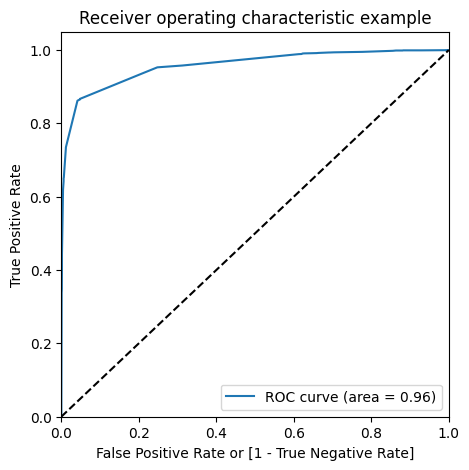

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.96 which indicating a good predictive model.

## Finding Optimal Cutoff Point¶


In [121]:
# Getting columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.313159,7962,0,1,1,1,1,0,0,0,0,0,0
1,0,0.213236,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.005055,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.969995,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.017378,9170,0,1,0,0,0,0,0,0,0,0,0


In [122]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.828311  0.952873  0.752087
0.2   0.2  0.828311  0.952873  0.752087
0.3   0.3  0.919021  0.865234  0.951935
0.4   0.4  0.921689  0.861926  0.958260
0.5   0.5  0.921689  0.861926  0.958260
0.6   0.6  0.921689  0.861926  0.958260
0.7   0.7  0.921689  0.861926  0.958260
0.8   0.8  0.891871  0.734601  0.988110
0.9   0.9  0.863936  0.652336  0.993423


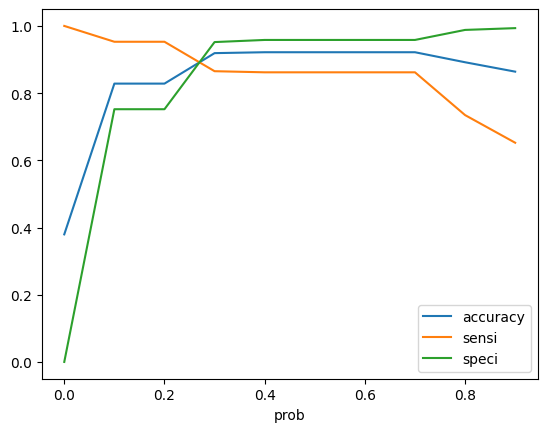

In [123]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [124]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.313159,7962,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.213236,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.005055,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.969995,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.017378,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [125]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.313159,7962,1,31
1,0,0.213236,5520,0,21
2,0,0.005055,1962,0,1
3,1,0.969995,1566,1,97
4,0,0.017378,9170,0,2


In [126]:
# Accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9190207156308852

In [127]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3763,  190],
       [ 326, 2093]], dtype=int64)

In [128]:
# true positive 
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0] 

In [129]:
# Sensitivity 
TP / float(TP+FN)

0.8652335675899132

In [130]:
# Specificity
TN / float(TN+FP)

0.9519352390589426

In [131]:
# False Postive Rate 
print(FP/ float(TN+FP))

0.048064760941057424


In [132]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9167761717038984


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9202739056003912


In [134]:
# Checking confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3763,  190],
       [ 326, 2093]], dtype=int64)

In [135]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9167761717038984

In [136]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8652335675899132

In [137]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9167761717038984

In [138]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8652335675899132

In [139]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

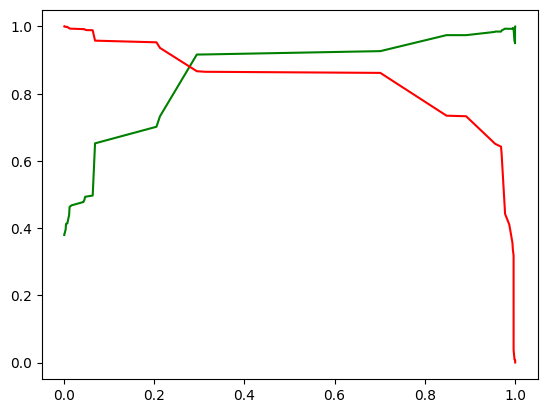

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,...,City_Tier II Cities,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Others,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3504,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,-0.089406,-0.108519,0.308788
4050,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,-0.788357,-0.888077,-1.133359
7201,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.322390,0.420993,-0.171928
1196,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0.143578,-0.110357,0.789504
8219,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.842530,-0.433947,-0.292107


In [143]:
X_test = X_test[cols]
X_test.head()

,LeadSource_Welingak Website,LastActivity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,LastNotableActivity_Email Opened,LastNotableActivity_SMS Sent
3504,0,0,0,0,0,0,0,1,0,0,0,1,0
4050,0,1,0,0,0,0,0,0,1,0,0,0,1
7201,0,1,0,0,0,0,1,0,0,0,0,0,1
1196,0,0,0,0,0,0,0,1,0,0,0,1,0
8219,0,0,0,0,0,1,0,0,0,0,0,0,0


In [144]:
X_test_sm = sm.add_constant(X_test)

## Checking Test Set

In [145]:
y_test_pred = res.predict(X_test_sm)

In [146]:
y_test_pred[:10]

3504    0.008547
4050    0.996443
7201    0.313159
1196    0.008547
8219    0.977619
8747    0.213236
9048    0.213236
6524    0.064322
7693    0.313159
8187    0.069504
dtype: float64

In [147]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Checking y_pred_1
y_pred_1.head()

,0
3504,0.008547
4050,0.996443
7201,0.313159
1196,0.008547
8219,0.977619


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Concatinating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.008547
1,1,4050,0.996443
2,0,7201,0.313159
3,0,1196,0.008547
4,1,8219,0.977619


In [153]:
# Getting converted Probability column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [154]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.008547
1,1,4050,0.996443
2,0,7201,0.313159
3,0,1196,0.008547
4,1,8219,0.977619


In [155]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

In [158]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9260344196265105

In [159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1626,   63],
       [ 139,  903]], dtype=int64)

In [160]:
# true positive 
TP = confusion2[1,1] 
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0] 

In [161]:
# Sensitivity
TP / float(TP+FN)

0.8666026871401151

In [162]:
# Specificity
TN / float(TN+FP)

0.9626998223801065

In [163]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9347826086956522

In [164]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8666026871401151

# Conclusions - 


#### For Train Data:

Accuracy : 91.90

Sensitivity : 8652

Specificity : 95.19


#### For Test Data: 

Accuracy : 92.60

Sensitivity : 86.66

Specificity : 96.26